In [1]:
%load_ext autoreload
%autoreload 2

%env TOMA_URL=https://staging.together.xyz/api

env: TOMA_URL=https://staging.together.xyz/api


### Using TOMA

In [2]:
from manifest import Manifest

# The responses are not fast
manifest = Manifest(
    client_name="tomadiffuser",
)

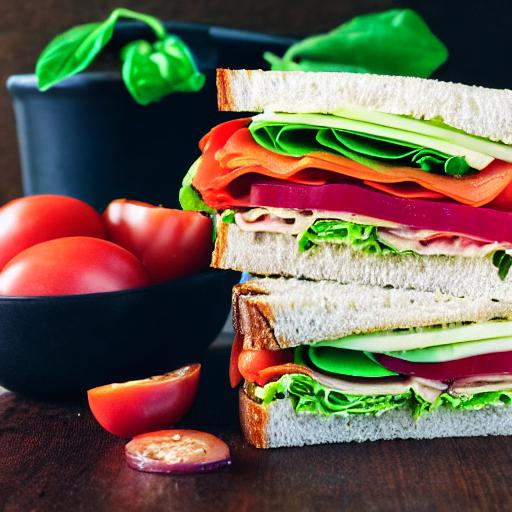

In [3]:
from PIL import Image

res = manifest.run("Sandwich with a purple tomato")
im = Image.fromarray(res)
display(im)

With a cache

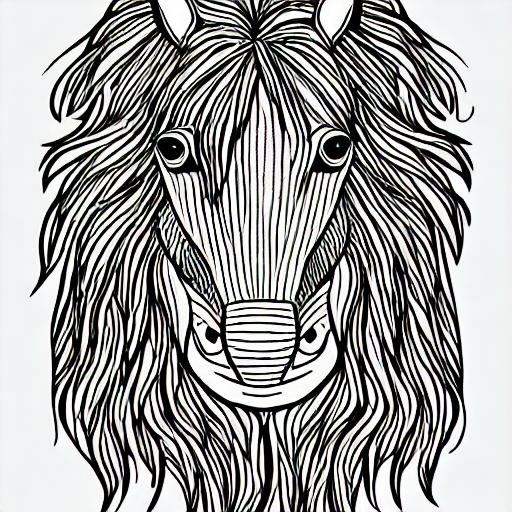

Took 5.63 seconds


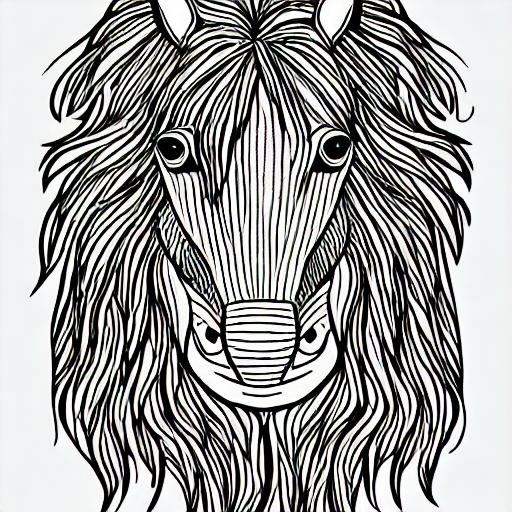

Now took 0.06 seconds


In [13]:
import time
import numpy as np

manifest = Manifest(
    client_name="tomadiffuser",
    cache_name="sqlite",
    cache_connection="my_sqlite_manifest.sqlite"
)

st = time.time()
res = manifest.run("Coloring book image of a horse", overwrite_cache=True)
im = Image.fromarray(res)
display(im)
print(f"Took {time.time() - st:.2f} seconds")

st = time.time()
res = manifest.run("Coloring book image of a horse")
im = Image.fromarray(np.array(res))
display(im)
print(f"Now took {time.time() - st:.2f} seconds")

### Using Locally Hosted Huggingface Diffusers

Run
```
python3 manifest/api/app.py --model_type diffuser --model_name_or_path runwayml/stable-diffusion-v1-5 --device 0
```
in a separate `screen` or `tmux`.

In [14]:
from manifest import Manifest

manifest = Manifest(
    client_name="diffuser",
    client_connection="http://127.0.0.1:5000",
)
print(manifest.client.get_model_params())

{'model_name': 'runwayml/stable-diffusion-v1-5', 'model_path': 'runwayml/stable-diffusion-v1-5'}


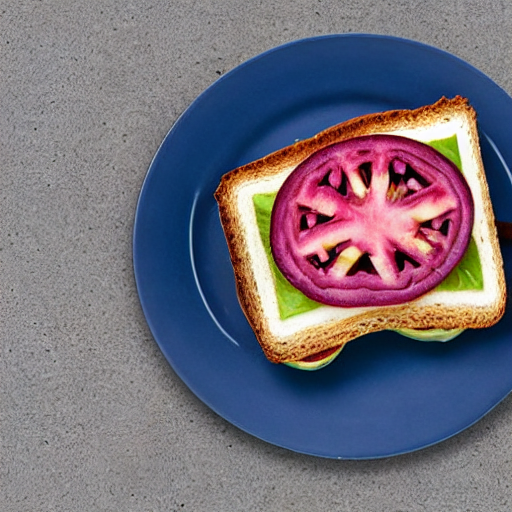

In [16]:
from PIL import Image

res = manifest.run("Sandwich with a purple tomato", client_timeout=300)
im = Image.fromarray(res)
display(im)